In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [3]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### y = 연속형 : 정규성 여부 판단
- 5천개 이하 : shapiro normality test
- 5천개 이상 : Anderson normality test

### 선정 변수 : age
- 분석 내용 : 나이가 정규 분포를 따르는가?
    - 귀무 가설 : 나이가 정규 분포이다.
    - 대립 가설 : 나이가 정규 분포가 아니다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 81.5 > 0.78 (pvalue 0.05)이므로 대립가설이 참.
    - 사실 결론 : 나이는 비정규 분포이다.

In [5]:
df_TOCC[['age']].describe()

,age
count,40509.000000
mean,46.608285
std,13.465977
min,20.000000
25%,37.000000
50%,46.000000
75%,56.000000
max,107.000000


In [6]:
df_age = df_TOCC[['age']]
df_age [:2]

,age
0,43.0
1,62.0


<function matplotlib.pyplot.show(close=None, block=None)>

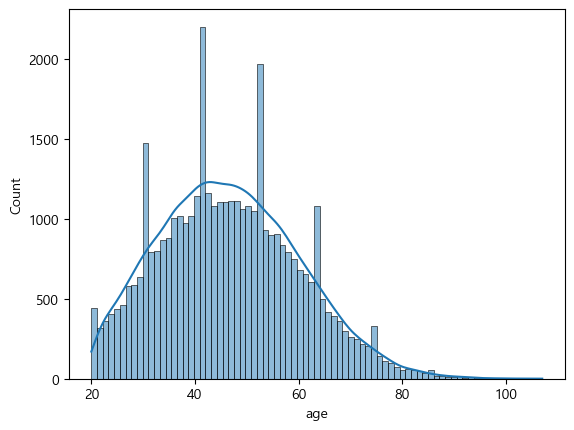

In [24]:
sns.histplot(data = df_TOCC, x='age', kde=True, binrange=None)
plt.show

In [12]:
df_age = df_TOCC['age'].dropna()

In [13]:
df_age_Mileage.corr()

,age,Mileage
age,1.000000,0.973281
Mileage,0.973281,1.000000


In [16]:
stats.anderson(df_age)

AndersonResult(statistic=81.5597210112901, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=46.60828457873559, scale=13.46597687950048)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [30]:
# s < cv : 정규분포 , s > cv :비정규 분포
s, cv, sl = stats.anderson(df_age)
s, cv, sl

(81.5597210112901,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

### 선정 변수 : Mileage [:200] (데이터가 5000개 이하일 때의 분석 결과를 확인하기 위해 데이터를 200개만 가져다 쓸 것이다.)
- 분석 내용 : Mileage가 정규 분포를 따르는가?
    - 귀무 가설 : Mileage는 정규 분포이다.
    - 대립 가설 : Mileage는 정규 분포가 아니다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설 참. (statistic=0.9847697019577026, pvalue=0.029488753527402878)
    - 사실 결론 : Mileage는 정규 분포가 아니다.

In [27]:
df_TOCC_dropna = df_TOCC.dropna()[:200]
df_TOCC_dropna[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


<Axes: xlabel='Mileage', ylabel='Count'>

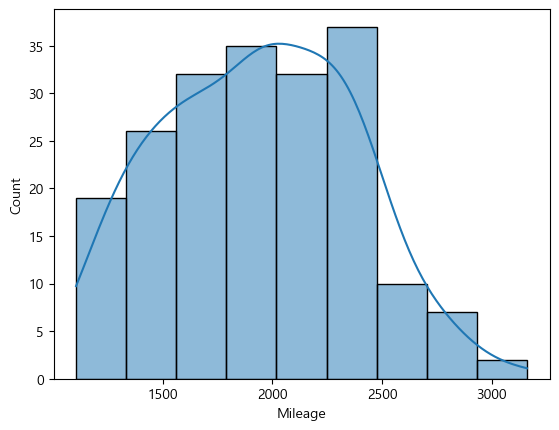

In [28]:
sns.histplot(data=df_TOCC_dropna, x='Mileage', kde=True)

In [29]:
stats.shapiro(df_TOCC_dropna['Mileage'])

ShapiroResult(statistic=0.9847697019577026, pvalue=0.029488753527402878)